In [ ]:
%load_ext autoreload
%autoreload 2


In [4]:
! pip install datasets

  Using cached datasets-4.4.1-py3-none-any.whl.metadata (19 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached huggingface_hub-1.1.2-py3-none-any.whl.metadata (13 kB)
  Using cached anyio-4.11.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.9 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached typer_slim-0.20.0-py3-none-any.whl.metadata (16 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
Using cached datasets-4.4.1-py3-none-any.whl (511 kB)
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
Using cached httpcore-1.0.9-py3-none-any.whl (78 kB)
Using cached huggingface_hub-1.1.2-py3-none-any.whl (514 kB)
Using cached hf_xet-1.2.0-c

In [3]:
# Download all builder configs for multiple ColliderML datasets
from datasets import load_dataset, DownloadConfig
import os
n_rows = 1000  # number of rows to download per config
custom_cache_path = "/storage/agrp/barakma/h_faces_cache"
os.environ["HF_DATASETS_CACHE"] = custom_cache_path           # datasets cache
os.environ["HF_HUB_CACHE"] = os.path.join(custom_cache_path, "hub")  # hub cache (used by streaming and scripts)
# List the dataset names you want to pull
colliderml_datasets = [
    "OpenDataDetector/ColliderML_ttbar_pu0",
    #"OpenDataDetector/ColliderML_higgs_pu0",
]
# Known configs exposed by the builder (from the error message)
builder_configs = ["particles", "tracker_hits", "calo_hits", "tracks"]
dl_cfg = DownloadConfig(
    cache_dir=custom_cache_path,
    local_files_only=True,   # do not hit the network; fail if not cached
    resume_download=True,
)
all_datasets = {}
for ds_name in colliderml_datasets:
    print(f"\n=== Dataset: {ds_name} ===")
    all_datasets[ds_name] = {}
    for cfg in builder_configs:
        print(f"Downloading config: {cfg}")
        # Each call returns a DatasetDict with train (and possibly other splits)
        all_datasets[ds_name][cfg] = load_dataset(
            ds_name,
            cfg,
            cache_dir=custom_cache_path,
            download_config=dl_cfg,
            split={"train": f"train[:{n_rows}]"},

        )
        # Basic info summary
        splits = list(all_datasets[ds_name][cfg].keys())
        print(f"  -> got splits: {splits}")
        for split in splits[:1]:  # just first split for brevity
            print(
                f"     {cfg}/{split}: {len(all_datasets[ds_name][cfg][split])} rows"
            )

print("\nCompleted downloads. Access structure like: all_datasets['OpenDataDetector/ColliderML_ttbar_pu0']['particles']['train'][:5]")

/storage/agrp/barakma/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



=== Dataset: OpenDataDetector/ColliderML_ttbar_pu0 ===
  -> got splits: ['train']
     particles/train: 1000 rows
  -> got splits: ['train']
     tracker_hits/train: 1000 rows
  -> got splits: ['train']
     calo_hits/train: 1000 rows
  -> got splits: ['train']
     tracks/train: 1000 rows

Completed downloads. Access structure like: all_datasets['OpenDataDetector/ColliderML_ttbar_pu0']['particles']['train'][:5]


In [ ]:
y=all_datasets['OpenDataDetector/ColliderML_ttbar_pu0']['tracks']['train'].with_format('numpy')


AttributeError: 'dict' object has no attribute 'with_format'

In [4]:
dataset = all_datasets['OpenDataDetector/ColliderML_ttbar_pu0']

In [18]:
calo_e = dataset['calo_hits']['train'].with_format('numpy')

In [20]:
calo_e['total_energy']

Column([array([0.00044844, 0.0005036 , 0.00105737, ..., 0.00556277, 0.00058174,
       0.00039059], dtype=float32), array([0.00019558, 0.00021954, 0.00022859, ..., 0.00321678, 0.00130492,
       0.00054187], dtype=float32), array([0.00071988, 0.0001745 , 0.00034726, ..., 0.00151616, 0.00047889,
       0.00168333], dtype=float32), array([9.49306486e-05, 6.17612823e-05, 4.94348526e-04, 7.13584130e-04,
       4.50505497e-04, 7.96432068e-05, 6.54126707e-05, 2.31074728e-03,
       9.93827271e-05, 6.76775308e-05, 1.26335814e-04, 6.26682013e-04,
       6.03788998e-03, 1.35296417e-04, 5.22678019e-04, 6.21258107e-04,
       9.45974462e-05, 6.40361031e-05, 1.70293861e-04, 5.34512510e-05,
       1.54693436e-04, 1.25707520e-04, 9.22474574e-05, 1.78819930e-04,
       7.28157247e-05, 1.33357273e-04, 2.87905743e-04, 7.54272187e-05,
       2.73344945e-03, 1.16449235e-04, 8.47123883e-05, 3.06644273e-04,
       1.51436179e-04, 6.63668325e-05, 3.14684759e-04, 9.62710619e-05,
       1.18709155e-04, 5.5888

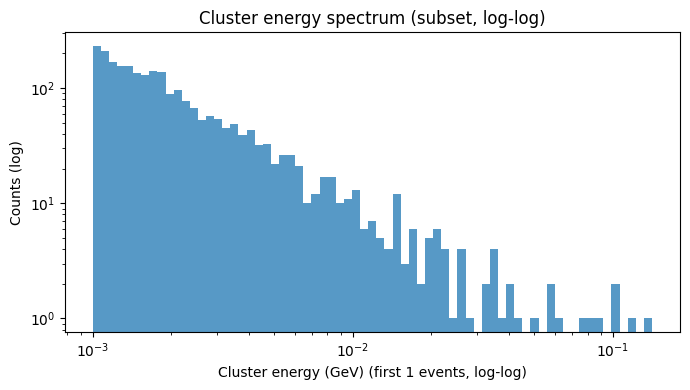

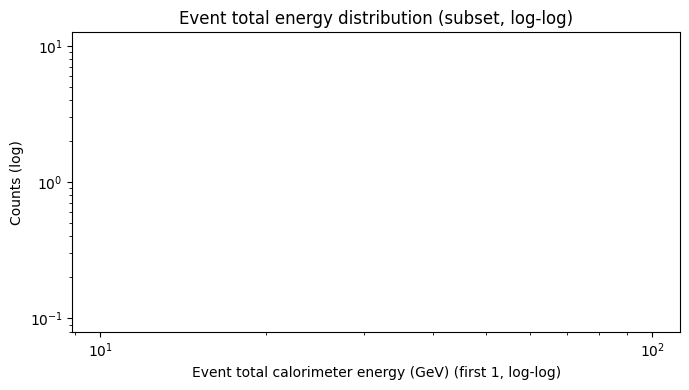

In [26]:
# ...existing code...
import numpy as np
import matplotlib.pyplot as plt

N_events = 1
total_energy_events = calo_e['total_energy'][:N_events]

# Cluster energies (subset)
all_E_N = np.concatenate([np.asarray(e, dtype=float) for e in total_energy_events])
all_E_N = all_E_N[all_E_N > 0]

# Log-spaced bins for x (energy)
bins_E = np.geomspace(max(all_E_N.min(), 1e-3), all_E_N.max(), 70)

plt.figure(figsize=(7,4))
plt.hist(all_E_N, bins=bins_E, color="#1f77b4", alpha=0.75)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(f"Cluster energy (GeV) (first {N_events} events, log-log)")
plt.ylabel("Counts (log)")
plt.title("Cluster energy spectrum (subset, log-log)")
plt.tight_layout()
plt.show()

# Per-event total energy (subset)
event_sum_E_N = np.array([np.sum(np.asarray(e, dtype=float)) for e in total_energy_events])
event_sum_E_N = event_sum_E_N[event_sum_E_N > 0]

bins_evt = np.geomspace(max(event_sum_E_N.min(), 1e-3), event_sum_E_N.max(), 60)

plt.figure(figsize=(7,4))
plt.hist(event_sum_E_N, bins=bins_evt, color="#d62728", alpha=0.75)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(f"Event total calorimeter energy (GeV) (first {N_events}, log-log)")
plt.ylabel("Counts (log)")
plt.title("Event total energy distribution (subset, log-log)")
plt.tight_layout()
plt.show()
# ...existing code...

In [2]:
from cluster.helpers.meanshift_mod import  MeanShiftMod

In [30]:
m = MeanShiftMod(bin_seeding=True, bandwidth=0.1)

In [31]:
from cluster.play import get_points_for_clustering
points= get_points_for_clustering(all_datasets, until_index=1)[0]

In [32]:
m.fit(points)

/storage/agrp/barakma/.venv/lib64/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


MeanShiftMod(bandwidth=0.1, bin_seeding=True)

n_clusters: 189
centers shape: (189, 2)
cluster counts: {0: 2040, 1: 1709, 2: 1096, 3: 950, 4: 871, 5: 806, 6: 797, 7: 541, 8: 610, 9: 489, 10: 360, 11: 377, 12: 309, 13: 294, 14: 363, 15: 285, 16: 198, 17: 128, 18: 152, 19: 162, 20: 131, 21: 125, 22: 117, 23: 121, 24: 144, 25: 113, 26: 96, 27: 91, 28: 97, 29: 91, 30: 86, 31: 81, 32: 74, 33: 83, 34: 71, 35: 67, 36: 64, 37: 62, 38: 62, 39: 61, 40: 58, 41: 57, 42: 74, 43: 55, 44: 51, 45: 49, 46: 47, 47: 47, 48: 45, 49: 44, 50: 42, 51: 41, 52: 38, 53: 45, 54: 44, 55: 36, 56: 29, 57: 45, 58: 26, 59: 25, 60: 25, 61: 24, 62: 23, 63: 22, 64: 23, 65: 18, 66: 15, 67: 14, 68: 14, 69: 9, 70: 13, 71: 12, 72: 12, 73: 14, 74: 10, 75: 10, 76: 9, 77: 9, 78: 13, 79: 6, 80: 13, 81: 8, 82: 6, 83: 5, 84: 5, 85: 5, 86: 5, 87: 4, 88: 4, 89: 5, 90: 2, 91: 4, 92: 4, 93: 4, 94: 95, 95: 4, 96: 4, 97: 4, 98: 3, 99: 2, 100: 3, 101: 4, 102: 4, 103: 2, 104: 3, 105: 3, 106: 4, 107: 3, 108: 3, 109: 3, 110: 4, 111: 3, 112: 2, 113: 2, 114: 2, 115: 2, 116: 4, 117: 2, 11

,eta_center,phi_center,count
0,-1.099056,-1.783450,2040
1,-1.998553,-1.012400,1709
2,-0.473868,2.038616,1096
3,-0.202791,0.310600,950
4,-0.932579,1.088857,871


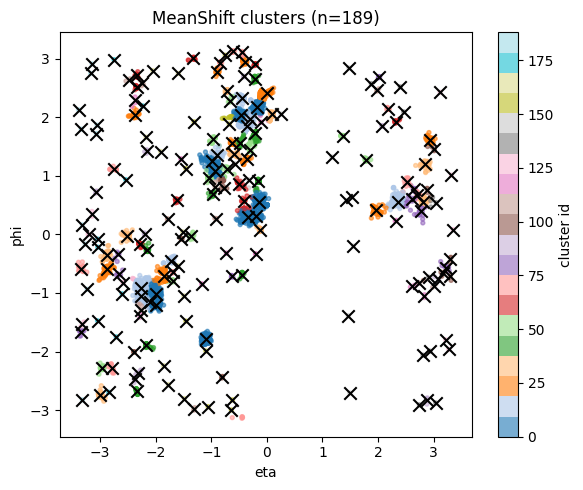

In [33]:
# ...existing code...
# Inspect MeanShift results
import numpy as np

labels = m.labels_
centers = m.cluster_centers_
n_clusters = len(np.unique(labels))
print("n_clusters:", n_clusters)
print("centers shape:", centers.shape)

# Per-cluster counts
unique, counts = np.unique(labels, return_counts=True)
print("cluster counts:", dict(zip(unique, counts)))

# Optional: build a summary table
import pandas as pd
summary = pd.DataFrame(centers, columns=["eta_center", "phi_center"])
summary["count"] = [counts[np.where(unique==i)[0][0]] for i in range(n_clusters)]
display(summary.head())

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
sc = plt.scatter(points[:,0], points[:,1], c=labels, s=8, cmap="tab20", alpha=0.6)
plt.scatter(centers[:,0], centers[:,1], c="k", s=80, marker="x")
plt.xlabel("eta")
plt.ylabel("phi")
plt.title(f"MeanShift clusters (n={n_clusters})")
plt.colorbar(sc, label="cluster id")
plt.tight_layout()
plt.show()
# ...existing code...

In [36]:
from datasets import load_dataset
import json
import numpy as np

# Load the four configurations (replace with full split if needed)
particles = all_datasets["OpenDataDetector/ColliderML_ttbar_pu0"]["particles"]["train"].with_format("numpy")
tracker_hits = all_datasets["OpenDataDetector/ColliderML_ttbar_pu0"]["tracker_hits"]["train"].with_format("numpy")
calo_hits = all_datasets["OpenDataDetector/ColliderML_ttbar_pu0"]["calo_hits"]["train"].with_format("numpy")
tracks = all_datasets["OpenDataDetector/ColliderML_ttbar_pu0"]["tracks"]["train"].with_format("numpy")

phoenix_data = {}

for i in range(1):
    event_id = particles[i]['event_id']
    event_key = f"Event {event_id}"
    event_data = {
        "event number": event_id,
        "run number": 0  # Placeholder; set to actual run if available
    }

    # Hits from tracker_hits
    hits = []
    for j in range(len(tracker_hits[i]['x'])):
        hit = {
            "pos": [tracker_hits[i]['x'][j], tracker_hits[i]['y'][j], tracker_hits[i]['z'][j]],
            "time": tracker_hits[i]['time'][j],
            "particle_id": tracker_hits[i]['particle_id'][j]
        }
        hits.append(hit)
    event_data["Hits"] = {"TrackerHits": hits}

    # Clusters from calo_hits
    clusters = []
    for j in range(len(calo_hits[i]['total_energy'])):
        cluster = {
            "pos": [calo_hits[i]['x'][j], calo_hits[i]['y'][j], calo_hits[i]['z'][j]],
            "e": calo_hits[i]['total_energy'][j]
        }
        clusters.append(cluster)
    event_data["Clusters"] = {"CaloClusters": clusters}

    # Tracks from tracks
    track_list = []
    for j in range(len(tracks[i]['d0'])):
        qop = tracks[i]['qop'][j]
        track = {
            "d0": tracks[i]['d0'][j],
            "z0": tracks[i]['z0'][j],
            "phi": tracks[i]['phi'][j],
            "theta": tracks[i]['theta'][j],
            "qop": qop,
            "charge": 1 if qop > 0 else -1  # Derived from qop sign
        }
        track_list.append(track)
    event_data["Tracks"] = {"ReconstructedTracks": track_list}

    # Vertices from particles (primary only)
    vertices = []
    for j in range(len(particles[i]['vx'])):
        if particles[i]['vertex_primary'][j] > 0:
            vertex = {
                "pos": [particles[i]['vx'][j], particles[i]['vy'][j], particles[i]['vz'][j]]
            }
            vertices.append(vertex)
    if vertices:
        event_data["Vertices"] = {"PrimaryVertices": vertices}

    phoenix_data[event_key] = event_data

# Save to JSON
with open("collider_ml_phoenix.json", "w") as f:
    json.dump(phoenix_data, f, indent=4)

print("JSON file generated: collider_ml_phoenix.json")

KeyboardInterrupt: 